In [1]:
data = read.csv("D:/Project/dataset 2.csv")

In [2]:
print(colnames(data))

[1] "ï..Cement..kg.m3."                   
[2] "Blast.furnace.Slag..kg.m3."          
[3] "Fly.Ash..kg.m3."                     
[4] "Water..kg.m3."                       
[5] "Super.plasticizer..kg.m3."           
[6] "Coarse.Aggregate...kg.m3."           
[7] "Fine.Aggregate..kg.m3."              
[8] "Age.of.testing..day."                
[9] "Concrete.compressive.strength..MPa.."


In [3]:
colnames(data)[1] <- "CEMENT"
colnames(data)[2] <- "Blast.furance.Slag"
colnames(data)[3] <- "Fly.ash"
colnames(data)[4] <- "Water"
colnames(data)[5] <- "Super.plasticizer"
colnames(data)[6] <- "Coarse.Aggregate"
colnames(data)[7] <- "Fine.Agrregate"
colnames(data)[8] <- "Age.of.testing.day"
colnames(data)[9] <- "Concrete.compressive.strength"
str(data)

'data.frame':	1133 obs. of  9 variables:
 $ CEMENT                       : num  336 140 350 162 225 ...
 $ Blast.furance.Slag           : num  0 4.2 0 148 0 134 190 192 24 0 ...
 $ Fly.ash                      : num  0 216 0 190 0 ...
 $ Water                        : num  182 194 203 179 181 ...
 $ Super.plasticizer            : num  3 4.7 0 19 0 ...
 $ Coarse.Aggregate             : num  986 1050 974 838 1113 ...
 $ Fine.Agrregate               : num  817 710 775 741 833 ...
 $ Age.of.testing.day           : int  28 28 14 28 7 28 28 7 7 28 ...
 $ Concrete.compressive.strength: num  44.9 26.4 22.5 42.1 11.2 ...


In [4]:
anyNA(data)

[1] FALSE

In [5]:
dataclean = data

In [6]:
summary(dataclean)

     CEMENT      Blast.furance.Slag    Fly.ash           Water      
 Min.   :102.0   Min.   :  0.00     Min.   :  0.00   Min.   :121.8  
 1st Qu.:190.0   1st Qu.:  0.00     1st Qu.:  0.00   1st Qu.:167.0  
 Median :266.0   Median : 26.00     Median :  0.00   Median :185.7  
 Mean   :276.5   Mean   : 74.27     Mean   : 62.81   Mean   :183.0  
 3rd Qu.:342.0   3rd Qu.:141.30     3rd Qu.:121.97   3rd Qu.:193.8  
 Max.   :540.0   Max.   :359.40     Max.   :260.00   Max.   :247.0  
 Super.plasticizer Coarse.Aggregate Fine.Agrregate  Age.of.testing.day
 Min.   : 0.000    Min.   : 708.0   Min.   :594.0   Min.   :  1.00    
 1st Qu.: 0.000    1st Qu.: 919.0   1st Qu.:720.0   1st Qu.: 14.00    
 Median : 6.700    Median : 966.8   Median :777.5   Median : 28.00    
 Mean   : 6.416    Mean   : 964.8   Mean   :770.5   Mean   : 44.06    
 3rd Qu.:10.160    3rd Qu.:1026.6   3rd Qu.:821.0   3rd Qu.: 28.00    
 Max.   :32.200    Max.   :1145.0   Max.   :992.6   Max.   :365.00    
 Concrete.compressiv

In [7]:
library(tidyr)
library(ggplot2)

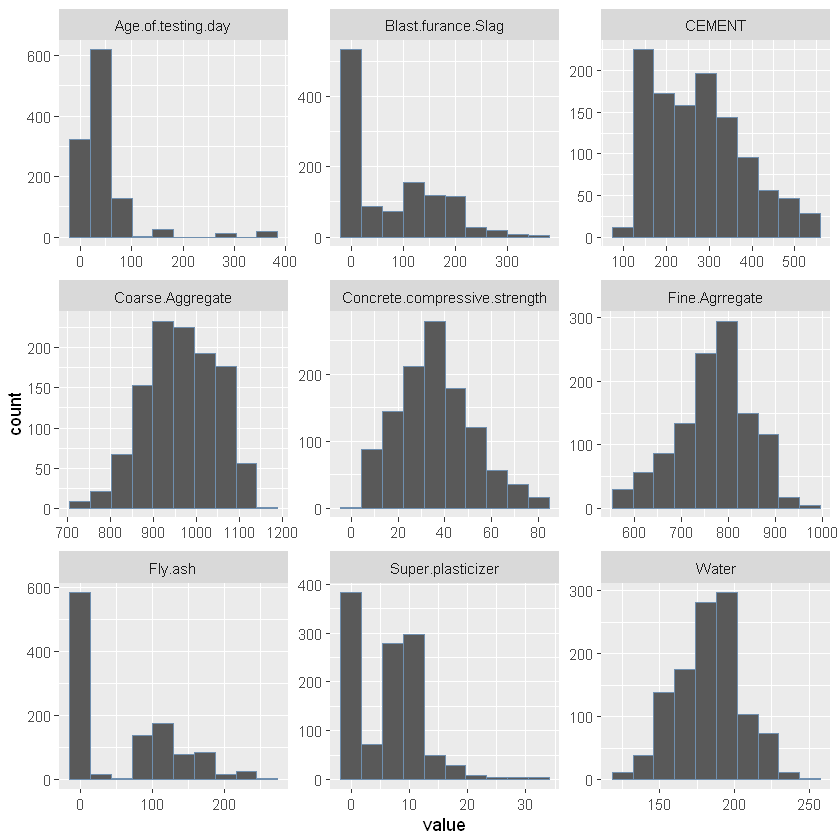

In [8]:
ggplot(gather(dataclean),aes(value))+geom_histogram(bins=10,col="#6F8FAF")+facet_wrap(~key,scales='free')

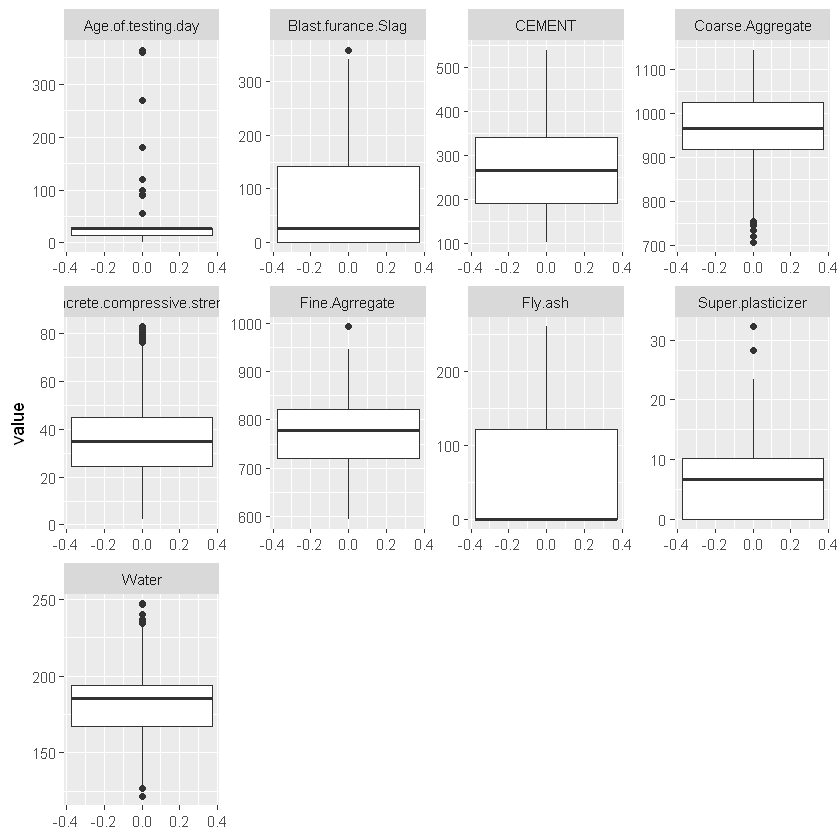

In [9]:
ggplot(gather(dataclean),aes(,value))+geom_boxplot()+facet_wrap(~key,scales="free",ncol=4)

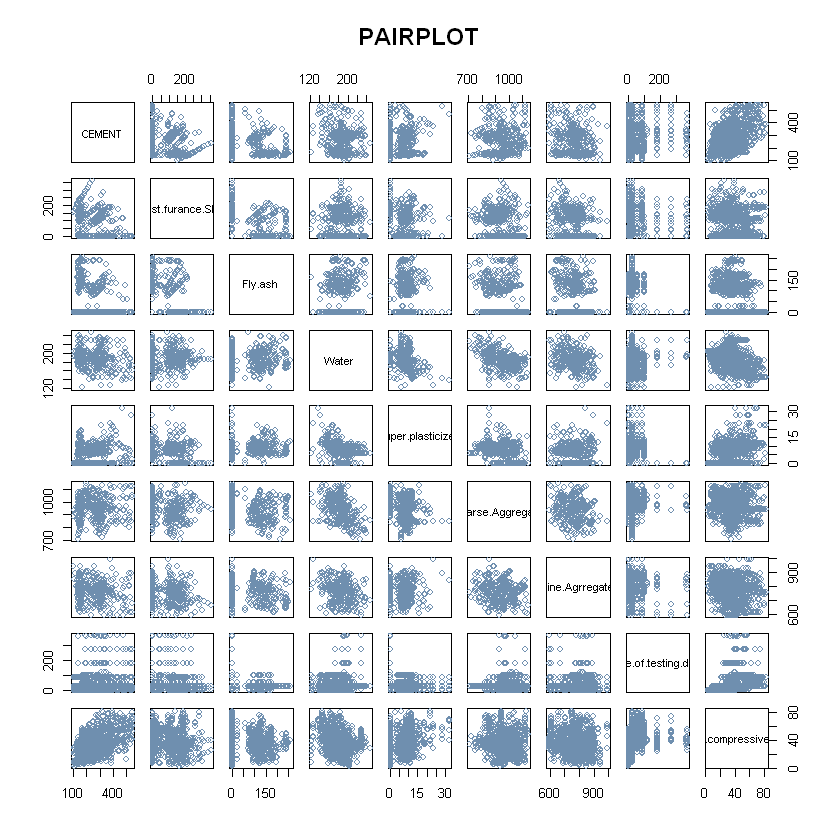

In [10]:
pairs(dataclean,col = "#6F8FAF",main = "PAIRPLOT")

In [11]:
Blast.furance.Slag <-  which(dataclean$Blast.furance.Slag  %in% boxplot(dataclean$Blast.furance.Slag , plot=FALSE)$out)
Fly.ash <- which(dataclean$Fly.ash %in% boxplot(dataclean$Fly.ash, plot=FALSE)$out)
Water <- which(dataclean$Water %in% boxplot(dataclean$Water, plot=FALSE)$out)
Super.plasticizer <- which(dataclean$Super.plasticizer  %in% boxplot(dataclean$Super.plasticizer , plot=FALSE)$out)
Coarse.Aggregate  <-  which(dataclean$Coarse.Aggregate   %in% boxplot(dataclean$Coarse.Aggregate  , plot=FALSE)$out)
Fine.Agrregate  <-  which(dataclean$Fine.Agrregate    %in% boxplot(dataclean$Fince.Agrregate   , plot=FALSE)$out)
Age.of.testing.day <-  which(dataclean$Age.of.testing.day    %in% boxplot(dataclean$Age.of.testing.day  , plot=FALSE)$out)

In [12]:
dataclean2 <- dataclean[-c(Blast.furance.Slag,Fly.ash,Water,Super.plasticizer,Coarse.Aggregate,Fine.Agrregate,Age.of.testing.day),]
nrow(dataclean2)


[1] 821

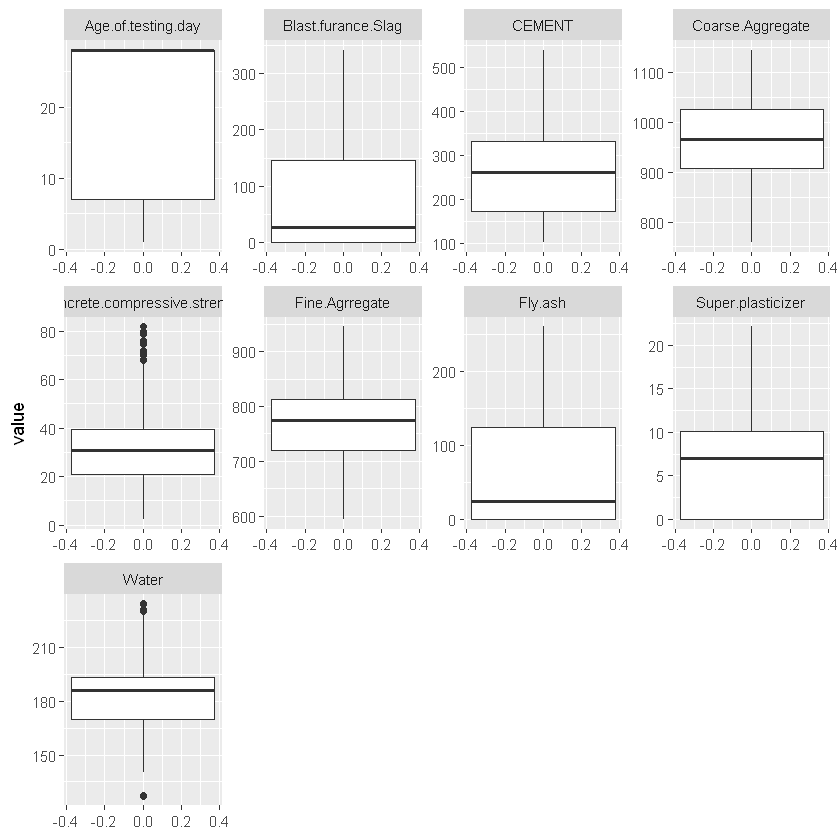

In [13]:
ggplot(gather(dataclean2),aes(,value))+geom_boxplot()+facet_wrap(~key,scales="free",ncol=4)


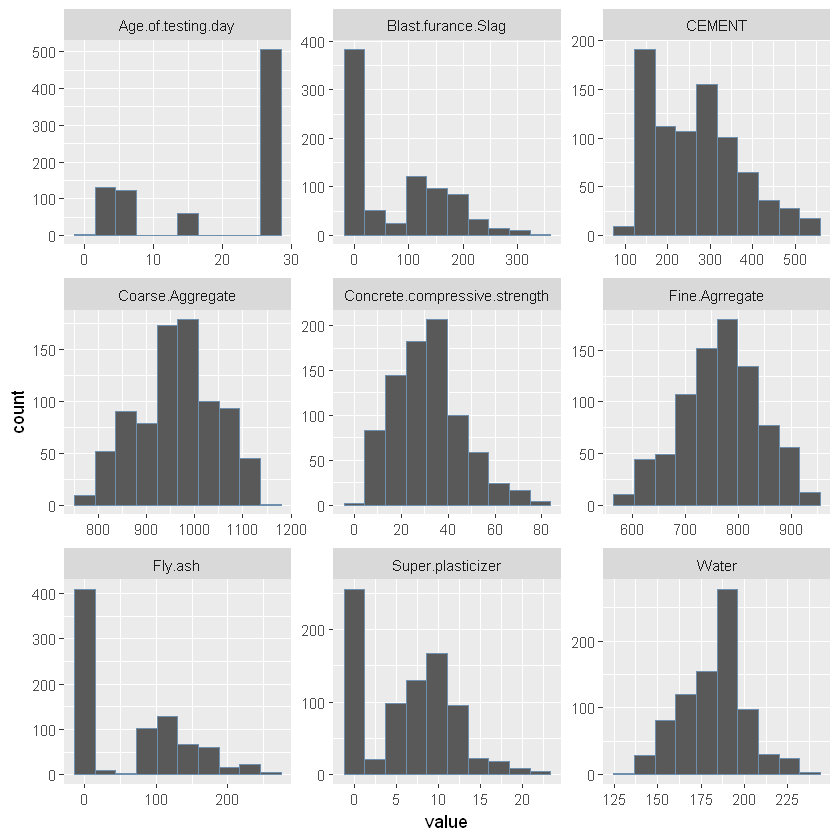

In [14]:
ggplot(gather(dataclean2),aes(value))+geom_histogram(bins=10,col="#6F8FAF")+facet_wrap(~key,scales='free')

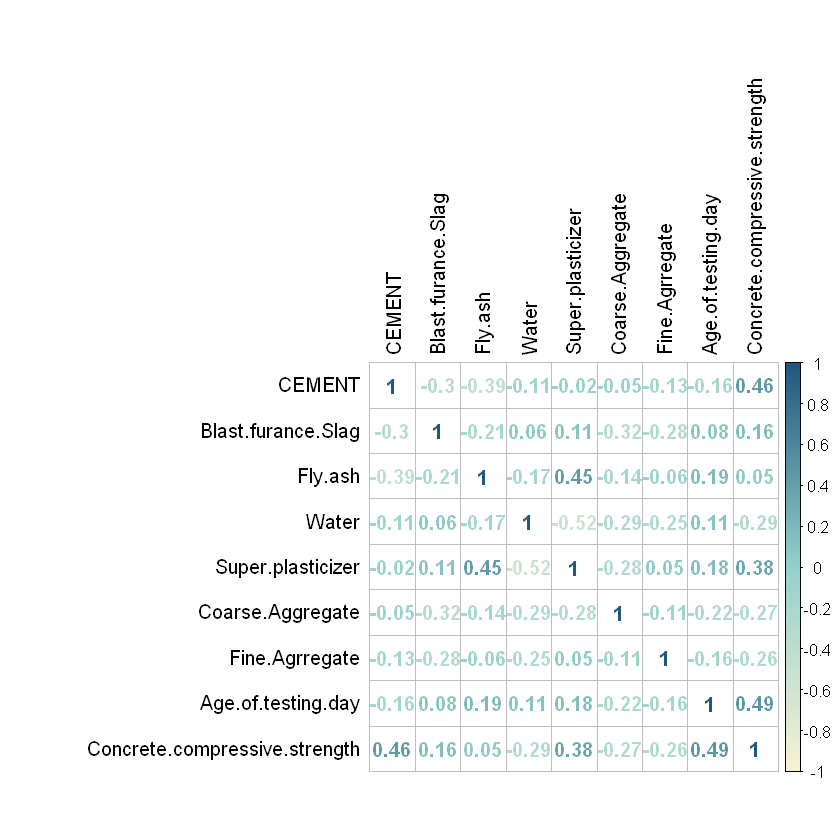

In [51]:
library(corrplot)
M <- cor(dataclean2, method = 'spearman')
corrplot(M,method = 'number',tl.col ="black",col = colorRampPalette(c("#F6F2D4", "#95D1CC", "#22577E"))(100))
         

In [16]:
CEMENT_Concrete.compressive.strength <- cor.test(dataclean2$CEMENT,dataclean2$Concrete.compressive.strength,method = "spearman",exact= FALSE   )



In [17]:
CEMENT_Concrete.compressive.strength$p.value 

[1] 4.137365e-44

In [19]:
CEMENT_Concrete.compressive.strength$estimate*sqrt((821-2)/(1-CEMENT_Concrete.compressive.strength$estimate^2))

rho 
14.80283

In [20]:
Age.of.testing.day_Concrete.compressive.strength <- cor.test(dataclean2$Age.of.testing.day,dataclean2$Concrete.compressive.strength,method = "spearman",exact= FALSE )


In [21]:
Age.of.testing.day_Concrete.compressive.strength$p.value

[1] 1.670783e-51

In [24]:
Super.plasticizer_Fly.ash <-  cor.test(dataclean2$Super.plasticizer,dataclean2$Fly.ash,method = "spearman",exact= FALSE )

In [25]:
Super.plasticizer_Fly.ash$p.value

[1] 1.557687e-42

In [28]:
Super.plasticizer_Water <-  cor.test(dataclean2$Super.plasticizer,dataclean2$Water, method = "spearman",exact= FALSE )
                                     

In [29]:
Super.plasticizer_Water$p.value

[1] 3.049787e-58

In [30]:
Super.plasticizer_Water$estimate*sqrt((821-2)/(1-Super.plasticizer_Water$estimate^2))

rho 
-17.45409

In [32]:
m1 = lm(Concrete.compressive.strength~Age.of.testing.day +Fine.Agrregate + Super.plasticizer+Water+Fly.ash+Coarse.Aggregate+CEMENT+Blast.furance.Slag,data=dataclean2)
summary(m1)


Call:
lm(formula = Concrete.compressive.strength ~ Age.of.testing.day + 
    Fine.Agrregate + Super.plasticizer + Water + Fly.ash + Coarse.Aggregate + 
    CEMENT + Blast.furance.Slag, data = dataclean2)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.6289  -4.2658  -0.1111   3.7203  28.7483 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -73.947300  20.542007  -3.600 0.000338 ***
Age.of.testing.day   0.763636   0.024154  31.616  < 2e-16 ***
Fine.Agrregate       0.041099   0.008294   4.955 8.80e-07 ***
Super.plasticizer    0.006483   0.070175   0.092 0.926413    
Water               -0.124358   0.029687  -4.189 3.11e-05 ***
Fly.ash              0.094912   0.008567  11.078  < 2e-16 ***
Coarse.Aggregate     0.029079   0.007271   3.999 6.93e-05 ***
CEMENT               0.142692   0.006331  22.537  < 2e-16 ***
Blast.furance.Slag   0.110485   0.007624  14.491  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.'

In [33]:
summary(m1)$coefficient 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-73.947300368,20.542007146,-3.599809,3.377670e-04
Age.of.testing.day,0.763635913,0.024153721,31.615663,1.221857e-143
Fine.Agrregate,0.041098982,0.008294221,4.955135,8.798504e-07
Super.plasticizer,0.006483233,0.070174727,0.092387,9.264134e-01
Water,-0.124358414,0.029687352,-4.188936,3.109623e-05
Fly.ash,0.094912468,0.008567489,11.078213,1.164664e-26
Coarse.Aggregate,0.029078750,0.007270674,3.999457,6.928001e-05
CEMENT,0.142692030,0.006331389,22.537239,9.772789e-88
Blast.furance.Slag,0.110484641,0.007624452,14.490830,1.714108e-42


In [34]:
m1 = lm(Concrete.compressive.strength~Age.of.testing.day+Fine.Agrregate+Water+Fly.ash+Coarse.Aggregate+CEMENT + Blast.furance.Slag, data=dataclean2)
summary(m1)


Call:
lm(formula = Concrete.compressive.strength ~ Age.of.testing.day + 
    Fine.Agrregate + Water + Fly.ash + Coarse.Aggregate + CEMENT + 
    Blast.furance.Slag, data = dataclean2)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.6249  -4.2809  -0.1373   3.7192  28.7360 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -73.243137  19.064027  -3.842 0.000132 ***
Age.of.testing.day   0.763845   0.024033  31.783  < 2e-16 ***
Fine.Agrregate       0.040926   0.008075   5.068 4.97e-07 ***
Water               -0.125811   0.025168  -4.999 7.07e-07 ***
Fly.ash              0.094940   0.008557  11.095  < 2e-16 ***
Coarse.Aggregate     0.028827   0.006735   4.280 2.09e-05 ***
CEMENT               0.142614   0.006271  22.742  < 2e-16 ***
Blast.furance.Slag   0.110410   0.007577  14.571  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.649 on 813 degrees of freedom
Multiple R-sq

In [35]:
summary(m1)$coefficient 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-73.24313698,19.064027006,-3.841955,1.315642e-04
Age.of.testing.day,0.76384457,0.024033225,31.782858,1.004729e-144
Fine.Agrregate,0.04092575,0.008074554,5.068483,4.967257e-07
Water,-0.12581080,0.025167930,-4.998854,7.065759e-07
Fly.ash,0.09493997,0.008557094,11.094884,9.858993e-27
Coarse.Aggregate,0.02882652,0.006734507,4.280420,2.087806e-05
CEMENT,0.14261401,0.006270995,22.741847,5.391909e-89
Blast.furance.Slag,0.11041029,0.007577237,14.571312,6.661703e-43


In [36]:
library(Metrics)

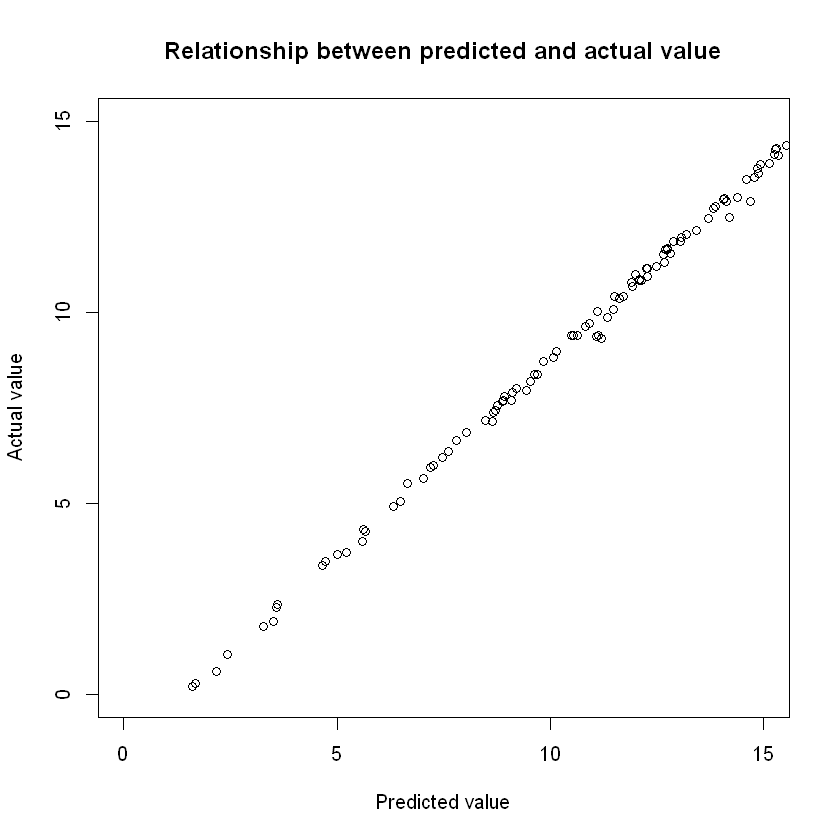

In [37]:
y = dataclean2$Concrete.comp.str
x = predict(m1, interval='confidence')
plot(x,y,xlim=c(0,15),ylim=c(0,15),xlab = 'Predicted value',ylab = 'Actual value',main = 'Relationship between predicted and actual value')
